# Langevin equation and Brownian motion

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants

%config InlineBackend.figure_format = 'retina' 

## Langevin Equation

Langevin theory provides now an equation of motion for objects whoch are subject to fluctuating forces. 
In the most general way, Newtons equation of motion is written as 

$$
m\frac{d\vec{v}}{dt}=\vec{F}(t)
$$

and contains on the right side the sum of all forces $\vec{F}$ acting on a particle. This total force can be separated into

- a viscous drag force, e.g. $6\pi \eta R \vec{v}$ for a spherical particle 
- a force coming from and external potential $U$
- random fluctuating force $\vec{\zeta}$ due to the collisions with the solvent 

With the force arising from an external potential we find the Langevin equation 


$$
m\frac{d\vec{v}}{dt}=-6\pi \eta R \vec{v}-\nabla U +\vec{\zeta}(t) \tag{Langevin Equation}
$$

The time dependence of the fluctuating force is not known in detail. Thus we can only refer to the statistical properties (e.g. its moments) when solving the Langevin equation. Therefore also not analytical solution for the position can be written down, only average proerties over an ensemble or over time (given ergodicity). 

The first moment (the mean) of the fluctuating force gives

$$
\langle\vec{\zeta}(t) \rangle =0
$$

i.e. there is no net force acting on average on the particle considered. Yet the mean velocity of the particle is not zero, $\langle \vec{v}\rangle\neq 0$. Considering the mean velocity at short times, for example, yields

$$
m\frac{d\langle \vec{v}\rangle}{dt}=-6\pi \eta R \langle \vec{v}\rangle
$$

giving 

$$
\langle \vec{v}\rangle=\vec{v}(0)\exp\left ( -\frac{t}{\tau_{mr}}\right)
$$

with $\tau_{mr}$ being the momentum relaxation time we discussed already earlier. We can further continue to derive the mean squared position by taking the scalar product of the Langevin equation with $\vec{r}$ and neglecting the potential. Taking the ensemble average yields

$$
m\frac{d}{dt}\langle \vec{r}\cdot \vec{v}\rangle =-6\pi \eta R \langle \vec{r}\cdot \vec{v}\rangle + m\langle v^2\rangle 
$$

since 

$$
\vec{r}\cdot \frac{d\vec{v}}{dt}=\frac{d}{dt}(\vec{r}\cdot \vec{v})-v^2
$$

and $\langle \vec{r}\cdot \vec{\zeta}\rangle =0$. Using our previous result for the mean squared velocity, i.e. $\langle v^2\rangle =3k_B T$ we obtain after integrating over time

$$
\langle \vec{r}\cdot \vec{v}\rangle =C\exp\left ( -\frac{t}{\tau_{mr}}\right)+ \frac{k_B T}{2\pi\eta R}
$$

Using the initial condition $\vec{r}(t=0)=0$ this gives 

$$
\langle \vec{r}\cdot \vec{v}\rangle =\frac{k_B T}{2\pi\eta R}\left (1 -\exp\left ( -\frac{t}{\tau_{mr}}\right)\right) 
$$

A second integration over time of $\langle \vec{r}\cdot \vec{v}\rangle$ can be carried out using 

$$
\langle \vec{r}\cdot \vec{v}\rangle=\frac{1}{2}\frac{d}{dt}\langle r^2\rangle 
$$

and we finally obtain the mean squared displacement

$$
\langle r^2\rangle =\frac{k_B T}{\pi \eta R}\left [ t-\tau_{mr}\left ( 1-\exp\left (-\frac{t}{\tau_{mr}}\right )\right )\right ]
$$

This is the mean squared displacement for an Ornstein Uhlenbeck process, a process, which has a persistence for a certain time and then is randomized. It described the transition from the ballistic to diffusive regime for a Brownian particle except that it misses the hydrodynamic memory in the intermediate regime. 

In [3]:
t=np.logspace(-15,0,1000)
k_B=1.381e-23 #J/K
T=300 #K
eta=1e-3 #mPa s
R=200e-9 #m
gamma=6*np.pi*eta*R
k=1e-9 #N/m

def MSD(t,taumr):
    return(k_B*T/(np.pi*R)*(t-taumr*(1-np.exp(-t/taumr))))

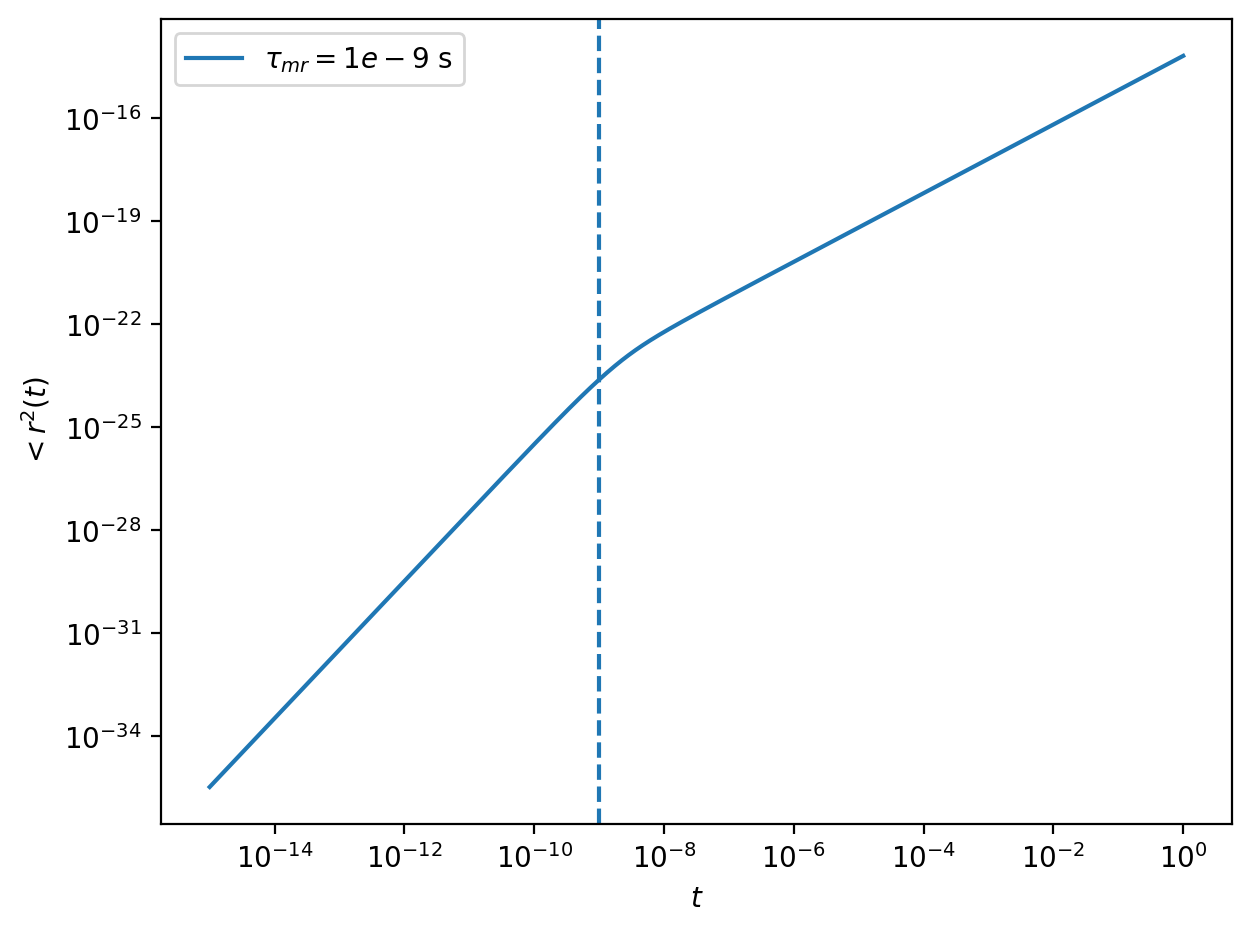

In [4]:
fig=plt.figure()
plt.ion()
plt.loglog(t,MSD(t,1e-9),label=r"$\tau_{mr}=1e-9$ s")
plt.axvline(x=1e-9,linestyle="--")
plt.xlabel(r"$t$")
plt.ylabel(r"$<r^2(t)$")
plt.legend()
plt.tight_layout()

![](img/test1.pdf)

We can look at different limits of the process with respect to the momentum relaxation time, ie. 

**1) long time limits:** $t\gg \tau_{mr}$ 

In this regime, the exponential function has already decayed to zero and we obtain

$$
\langle r^{2}\rangle =6Dt 
$$

with 

$$
D=\frac{k_B T}{6\pi\eta R}
$$

**1) short times:** $t\approx \tau_{mr}$ 

For short times, we can expand the exponential function up to second order

$$
\exp\left ( -\frac{t}{\tau_{mr}}\right )\approx 1-\frac{t}{\tau_{mr}}+\frac{t^2}{\tau_{mr}^2}
$$

to obtain for 

$$ 
t-\tau_{mr}\left ( 1-\exp\left (-\frac{t}{\tau_{mr}}\right )\right )\approx \frac{t^2}{2\tau_{mr}}
$$

and for the mean squared displacement 

$$
\langle r^2 \rangle \propto t^2
$$

which is the result we expect for ballistic motion. Between both regimes, the MSD could be complicated as the short time motion starts a hydrodynamic flux in the environment which is influencing the particle motion again. These hydrodynamic memory effects cause the so called long time tails in the mean squared displacement. The Langevin equation in one dimension then reads like 

\begin{equation}
M^{\prime} \ddot{x}(t)= 
-6 \pi \eta R \dot{x}(t)-6 R^{2} \sqrt{\pi \rho_{f} \eta} \int_{0}^{t}\left(t-t^{\prime}\right)^{-1 / 2} \ddot{x}\left(t^{\prime}\right) \mathrm{d} t^{\prime} -\nabla U+\zeta(t)
\end{equation}

and contains the effective mass of the colloidal $M^{\prime}$, the fluid density $\rho_f$  and the external potential $U. The full MSD for a colloidal particle is displayed in the figure below as measured for example in an optical tweezer in the Molecular Nanophotonics group. Note that the MSD axis goes down to $10^{-21}\, {\rm m}$, which corresponds to 30 picometer displacement, which is far below the size of a hydrodgen atom.

![MSD](img/msd_bead.png)

While we so far only know that $\langle\vec{\zeta}(t) \rangle =0$, we also know that there must be a certain magnitude of the random force that is connected to the temperature of the sample. The short time autocorrelation of the noise should be of the type

$$
\langle\vec{\zeta}(t_1)\cdot \vec{\zeta}(t_2) \rangle =A\delta (t_1-t_2)
$$

stating the the forces are truly random and only correlated, when the times conincide. We would like to determine the prefactor $A$ now. We can write down the Langevin equation with 

$$
\frac{d}{dt}\vec{v}(t)=-\frac{1}{\tau_{mr}}\vec{v}(t)+\frac{1}{m}\vec{\zeta}(t)
$$

and multiply by $\exp(t/\tau_{mr})$, which results in 

$$
\exp\left (\frac{t}{\tau_{mr}}\right )\frac{d}{dt}\vec{v}(t)+\frac{1}{\tau_{mr}}\exp\left (\frac{t}{\tau_{mr}}\right )\vec{v}(t)=\frac{d}{dt}\left (\exp\left (\frac{t}{\tau_{mr}}\right )\vec{v}(t) \right )=\exp\left(\frac{t}{\tau_{mr}}\right )\frac{1}{m}\vec{\zeta}(t)
$$

Integrating both sides of the two right parts over time results in 

$$
\vec{v}(t)=\vec{v}(0)\exp \left (-\frac{t}{\tau_{mr}} \right )+\exp \left (-\frac{t}{\tau_{mr}} \right )\frac{1}{m}\int_0^t \exp \left (\frac{t'}{\tau_{mr}} \right )\vec{\zeta}(t')dt'
$$

which is the time evolution of the velocity. To obtain $\langle\vec{\zeta}(t_1)\cdot \vec{\zeta}(t_2) \rangle$, we need to calculate the product of the velocity at two times and take the ensemble average. The calculation is essentially a writing exercise which at the end yields three different terms.

The first term contains

$$
\langle v_0^2 \rangle \exp\left (-\frac{2t}{\tau_{mr}} \right )\rightarrow 0
$$

which decays to zero for long times. The second term contains two mixed terms of the type

$$
\frac{v_0}{m}\exp\left (-\frac{t}{\tau_{mr}} \right ) \int \ldots \rightarrow 0
$$

which also decay to zero for long times. The last term contains

$$
\frac{1}{m^2}\int_{-\infty}^{t}dt' \int_{-\infty}^{t}dt''\exp\left ( -\frac{t-t'}{\tau_{mr}} \right )\exp\left ( -\frac{t-t''}{\tau_{mr}} \right )\langle \vec{\zeta}(t')\vec{\zeta}(t'')\rangle
$$

whcih is the only nonzero term. Inserting our initial assumption $\langle\vec{\zeta}(t_1)\cdot \vec{\zeta}(t_2) \rangle =A\delta (t_1-t_2)$ results in the mean squared velocity

$$
\langle v^2\rangle =\frac{A}{2m}\int_{-\infty}^{t}dt' \exp\left ( -\frac{2(t-t')}{\tau_{mr}}\right)=\frac{A\tau_{mr}}{2m^2}
$$

Since the velocity also has to comply with equipartition, i.e. 

$$
\langle v^2\rangle=\frac{k_B T}{m}=\frac{A\tau_{mr}}{2m^2}
$$

we find 

$$
A=2\gamma k_B T
$$

with $\gamma=6\pi\eta R$ or

$$
\langle\vec{\zeta}(t_1)\cdot \vec{\zeta}(t_2) \rangle =2\gamma k_B T\delta (t_1-t_2)
$$

which is a very fundamental result. It states that the fluctuating force $\vec{\zeta}(t)$ are related to the viscous forces expressed by the friction coefficient $\gamma$. This makes sensse, since the friction forces must dissipate energy into heat. The motion would thus come to a rest if heat and dynamics would be decoupled. The law we obtained is thus stateing the dissipated energy goes back again into kinetic energy. This is the statement of the fluctuation dissipation theorem,

## Fluctuation Dissipation Theorem

The fluctuation dissipation theorem (FDT) generalizes the previous finding into 

$$
\chi''(\omega)=\frac{\omega}{2k_B T}\langle |x_{\omega}|^2\rangle \tag{Fluctuation dissipation relation}
$$

which is now converted into frequency space. On the left side is the imaginary part of a response function or susceptibility $\chi$, which is connected to the dissipation. The right side contains the power spectral density of the fluctuation of a variable $x_{\omega}$ at the frequency $\omega$. So the amplitude of a fluctuation at a certain frequency is connected to the dissipation in equilibrium.

### Damped Driven Harmonic Oscillator

We would like to have a look at the FDT using a 1d damped driven oscillator given by the following equation

$$
m\ddot{x}+\gamma \dot{x}+kx=F(t)
$$

with $k$ being the spring constant of the harmonic potential and $\gamma$ the friction coefficient. Solving this differential equation yields for the amplitude of the oscillation at a certain driving frequency of $F(t)$

$$
x_{\omega}=\frac{1}{k-m\omega^2-i\gamma \omega}F_{\omega}
$$

which is clearly a linear response relation as amplitude and force dependent lineraly on each other. The term converting the force into an amplitude is the response function

$$
\chi(\omega)=\frac{1}{k-m\omega^2-i\gamma \omega} \tag{response function}
$$

which can be split into real and imaginary part, i.e. $\chi=\chi'(\omega)+i\chi'' (\omega)$. A quick calculation shows that 

$$
\chi''(\omega)=\frac{\omega \gamma}{(k-m\omega^2)^2+(\omega \gamma)^2}
$$

In the overdamped regime (i.e. $m=0$) we therefore find for the imaginary part

$$
\chi''(\omega)=\frac{\omega \gamma}{k^2+(\omega \gamma)^2}
$$

If we furthe rswitch off the harmonic potential we just have 

$$
\chi''(\omega)=\frac{\omega \gamma}{\omega^2 \gamma^2}
$$

which is the response function for Brownian motion. From this we find 

$$
\frac{\chi''(\omega)}{\omega}=\frac{1}{\omega^2 \gamma}\langle |x_{\omega}|^2\rangle=\frac{1}{\gamma \omega^2}
$$

or 

$$
\langle |x_{\omega}|^2\rangle=\frac{2k_B T}{\gamma \omega^2}
$$

for the amplitude and 

$$
\langle |v_{\omega}|^2\rangle=\frac{2k_B T}{\gamma}
$$

for the velocity amplitude. This is the frequency spectrum of the positional and speed fluctuations of a Brownian particle. This is exactly what is found in an optical tweezer for a Brownian particle at high frequencies. At lower frequencies the particle bounces from the harmonic potential and the motion of the colloid is restricted.


$$
\frac{\chi''(\omega)}{\omega}=\frac{\gamma}{k^2+(\omega \gamma)^2}=\frac{1}{2k_B T}\langle |x_{\omega}|^2\rangle
$$

From thsi follows the power spectral density of tge positional fluctuations in an optical tweezers


$$
\langle |x_{\omega}|^2\rangle =\frac{2k_B T \gamma}{k^2}\frac{1}{1+(\omega/\omega_0)^2}
$$

Here $\omega_0=k/\gamma$ is a particular frequency at which the $1/\omega^2$ dependence of the power spectrum turns into a plateau at small frequencies.  The last equation is heavily used to calibrate optical tweezers, as it can be used to measure the force constant $k$.

In [5]:
omega=np.logspace(-3,3,1000)
k_B=1.381e-23 #J/K
T=300 #K
eta=1e-3 #mPa s
R=200e-9 #m
gamma=6*np.pi*eta*R
k=1e-9 #N/m

def PSD(omega,k):
    return(2*k_B*T*gamma/(k**2*(1+omega*gamma/k)**2))

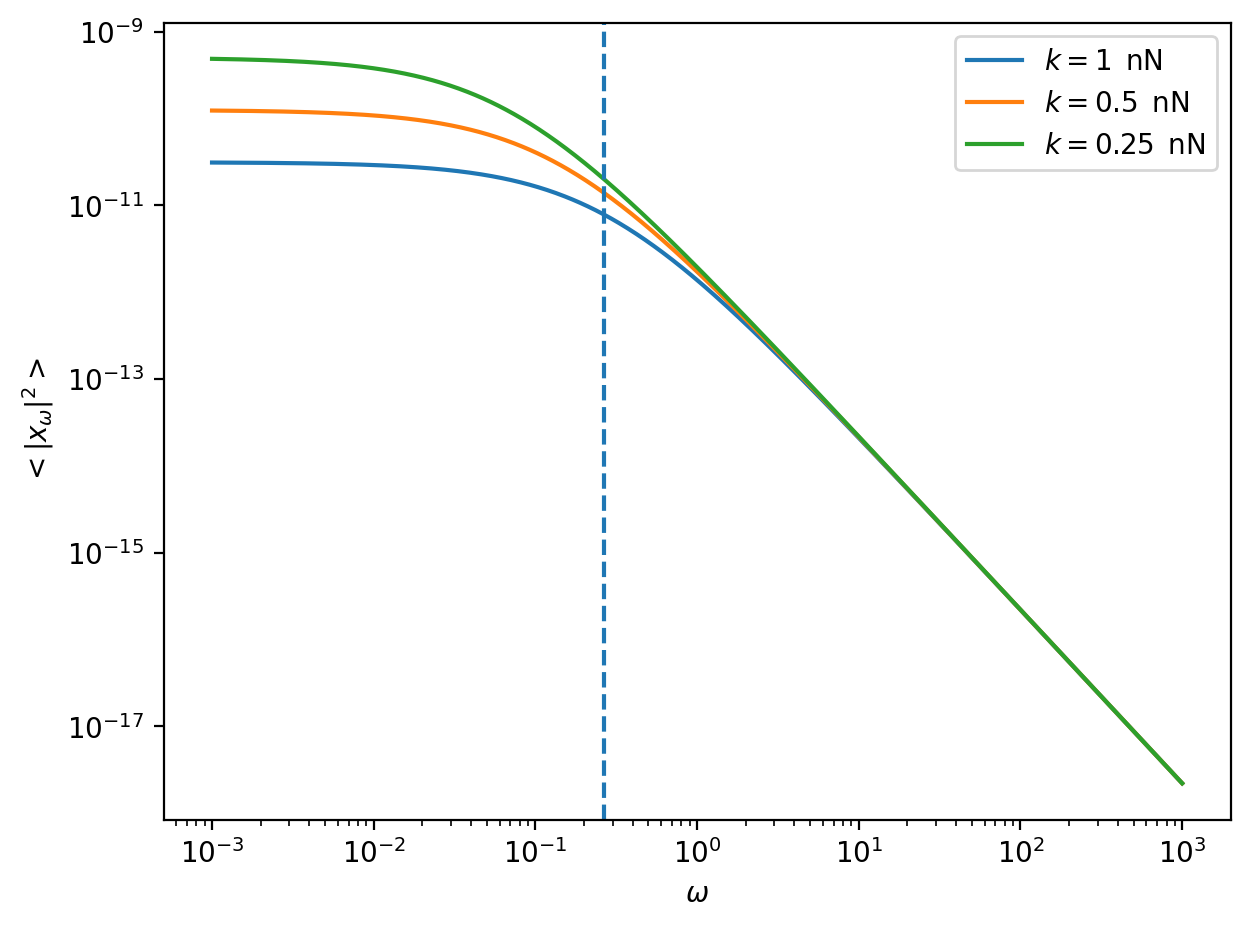

In [6]:
fig=plt.figure()
plt.ion()
plt.loglog(omega,PSD(omega,k),label=r"$k=1\,$ nN")
plt.loglog(omega,PSD(omega,k/2),label=r"$k=0.5\,$ nN")
plt.loglog(omega,PSD(omega,k/4),label=r"$k=0.25\,$ nN")
plt.axvline(x=k/gamma,linestyle="--")
plt.xlabel(r"$\omega$")
plt.ylabel(r"$<|x_{\omega}|^2>$")
plt.legend()
plt.tight_layout()

![](img/test.pdf)